### 《多頭排列均線回踩策略》

標的：台股 (上市櫃)

進場：當日K棒擊穿10日均線，但仍滿足5/10/20/60均線多頭排列 (隔日開盤買入)

出場：5日均線下穿60日均線 (隔日開盤賣出)

頻率：日策略 

檔數上限：10 (低股價優先進場)

回測期間：2013-01-30 ~ 2023-03-31

In [1]:
import BBQuant as bbq
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_feather('/Users/kuanhsu/Desktop/code/Python/FILE/還原股價日資料.ftr')

In [2]:
close = bbq.get(df, 'Close')
open = bbq.get(df, 'Open')
low = bbq.get(df, 'Low')
volume = bbq.get(df, 'Volume')

In [88]:
ma_5 = close.average(5)
ma_10 = close.average(10)
ma_20 = close.average(20)
ma_60 = close.average(60)

entries = (ma_5 > ma_10) & (ma_10 > ma_20) & (ma_20 > ma_60) & (low < ma_10).sustain(1) & (low > ma_20) & (low > ma_60)
exits = (ma_5 < ma_60)

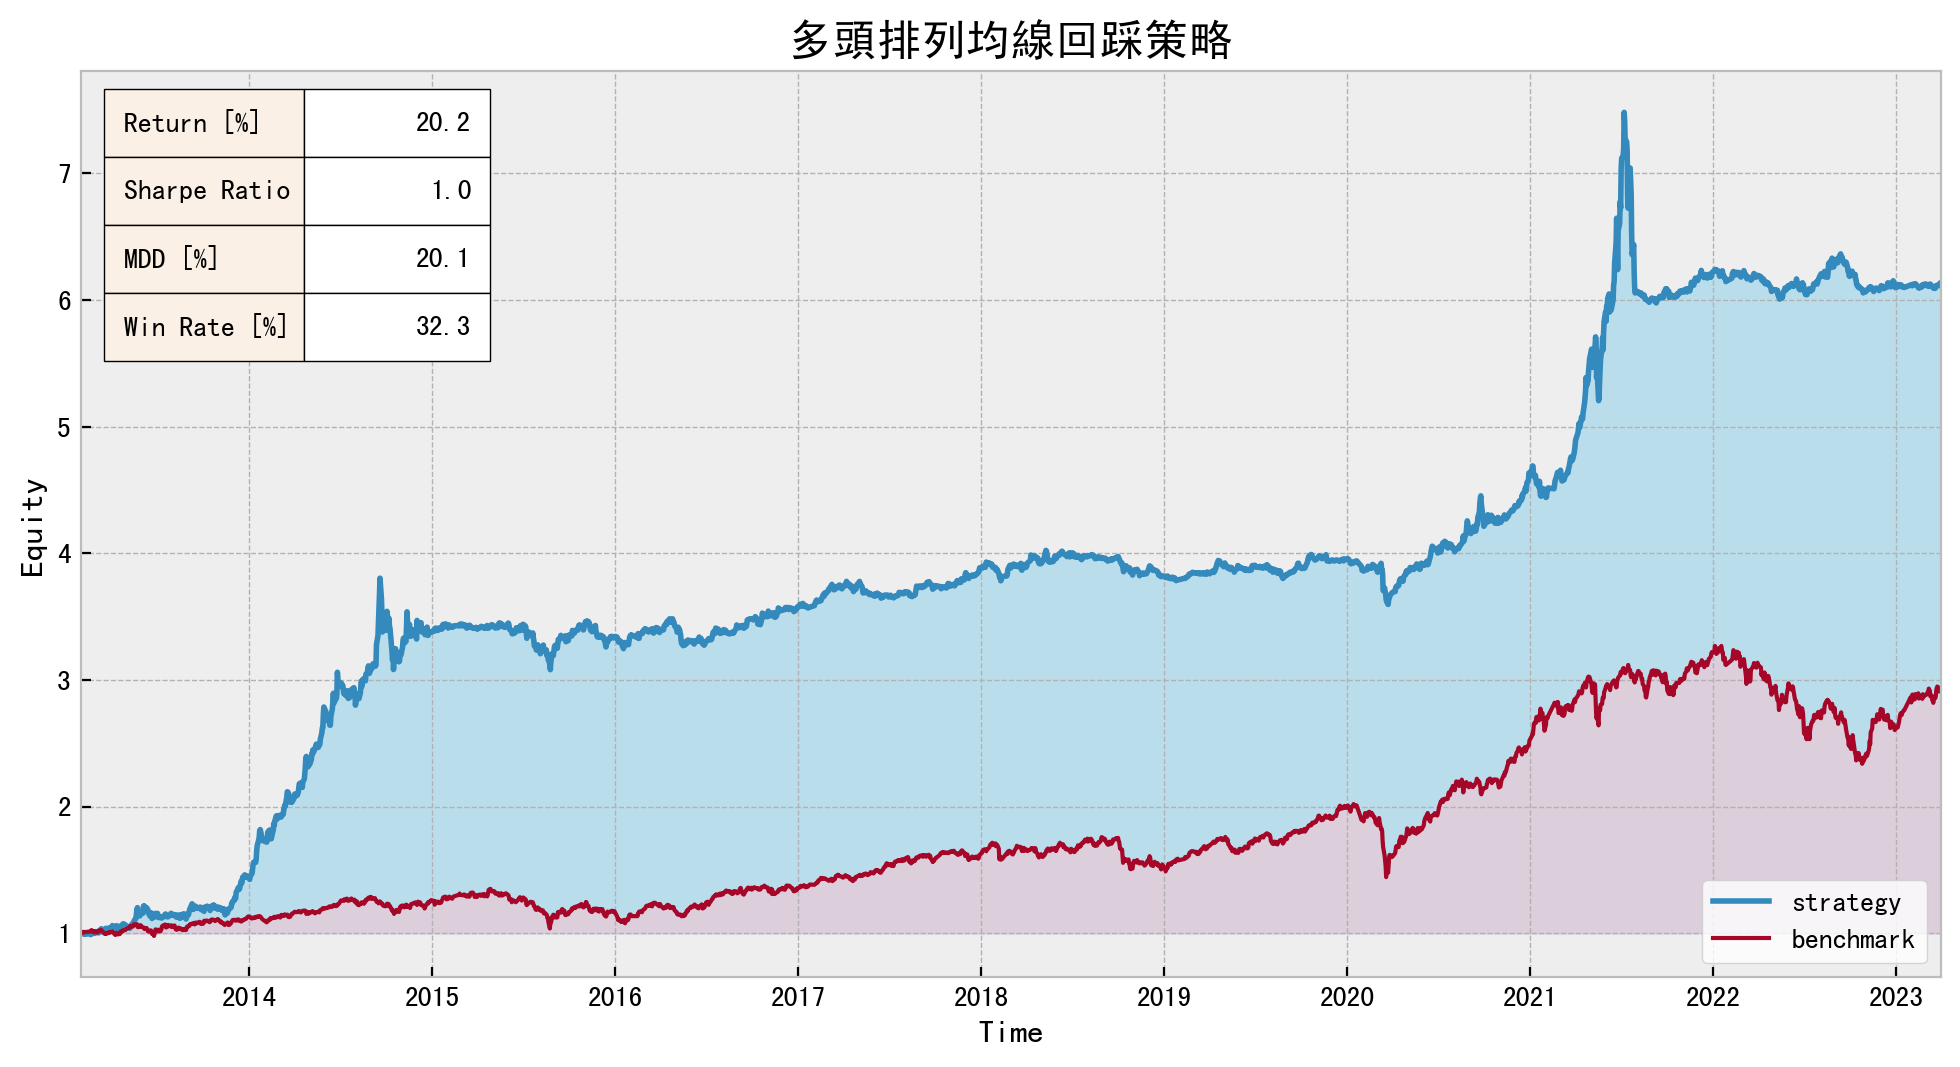

In [91]:
bt = bbq.setting(open, nstocks=10, rank=-close)
position = bt.strategy(entries, exits)
report = bt.sim(position)
report.display(name='多頭排列均線回踩策略')

In [92]:
report.analyze()

In [93]:
report.stats()

Start Date                    2013-01-30
End Date                      2023-03-31
Period [days]                       2486
Win Period [days]                   1348
Total Return [%]                  513.06
Total Benchmark Return [%]        194.13
Return [%]                         20.18
Benchmark Return [%]               11.56
Volatility [%]                     50.94
MDD [%]                            20.12
MDD Duration [days]                   64
Total Trades                         626
Win Rate [%]                       32.27
Best Trade [%]                    148.02
Worst Trade [%]                    -3.05
Average Trade [%]                    0.8
Profit Factor                       2.83
Win Loss Ratio                      5.94
Sharpe Ratio                        0.99
Sortino Ratio                       1.12
Calmar Ratio                         1.0
dtype: object

In [94]:
report.best_trade()

Asset                6114
Entry Date     2013-10-31
Exit Date      2014-12-24
Entry Price          3.22
Exit Price           50.9
Weight                0.1
Return            1.48016
Name: 88, dtype: object

In [95]:
report.worst_trade()

Asset                6788
Entry Date     2022-09-29
Exit Date      2022-10-17
Entry Price         123.0
Exit Price           90.0
Weight           0.111111
Return           -0.03046
Name: 586, dtype: object

---

### 《大戶營收策略》

標的：台股 (上市櫃)

進場：200張以上大戶持股占比>60%，當月營收較去年同月增加40% (隔日開盤買入)

出場：200張以上大戶持股占比連兩週下降 (隔日開盤賣出)

頻率：日策略 

檔數上限：5 (低股價優先進場)

回測期間：2016-02-02 ~ 2023-03-31

In [11]:
import BBQuant as bbq
import pandas as pd
import warnings
from tqdm import tqdm_notebook
from tqdm.notebook import tqdm_notebook
warnings.filterwarnings("ignore")
tqdm_notebook.pandas()

df = pd.read_feather('/Users/kuanhsu/Desktop/code/Python/FILE/還原股價日資料.ftr')
pb = pd.read_feather('/Users/kuanhsu/Desktop/code/Python/FILE/股價淨值比.ftr')
revenue = pd.read_feather('/Users/kuanhsu/Desktop/code/Python/FILE/營收年增率.ftr')
depository = pd.read_feather('/Users/kuanhsu/Desktop/code/Python/FILE/集保戶.ftr')

In [12]:
close = bbq.get(df, 'Close')
open = bbq.get(df, 'Open')
volume = bbq.get(df, 'Volume')
pbr = bbq.get(pb, 'PBR')
rev_y = bbq.get(revenue, 'ygrowth')
large = bbq.get(depository, 'above_400')
major = bbq.get(depository, 'above_200')

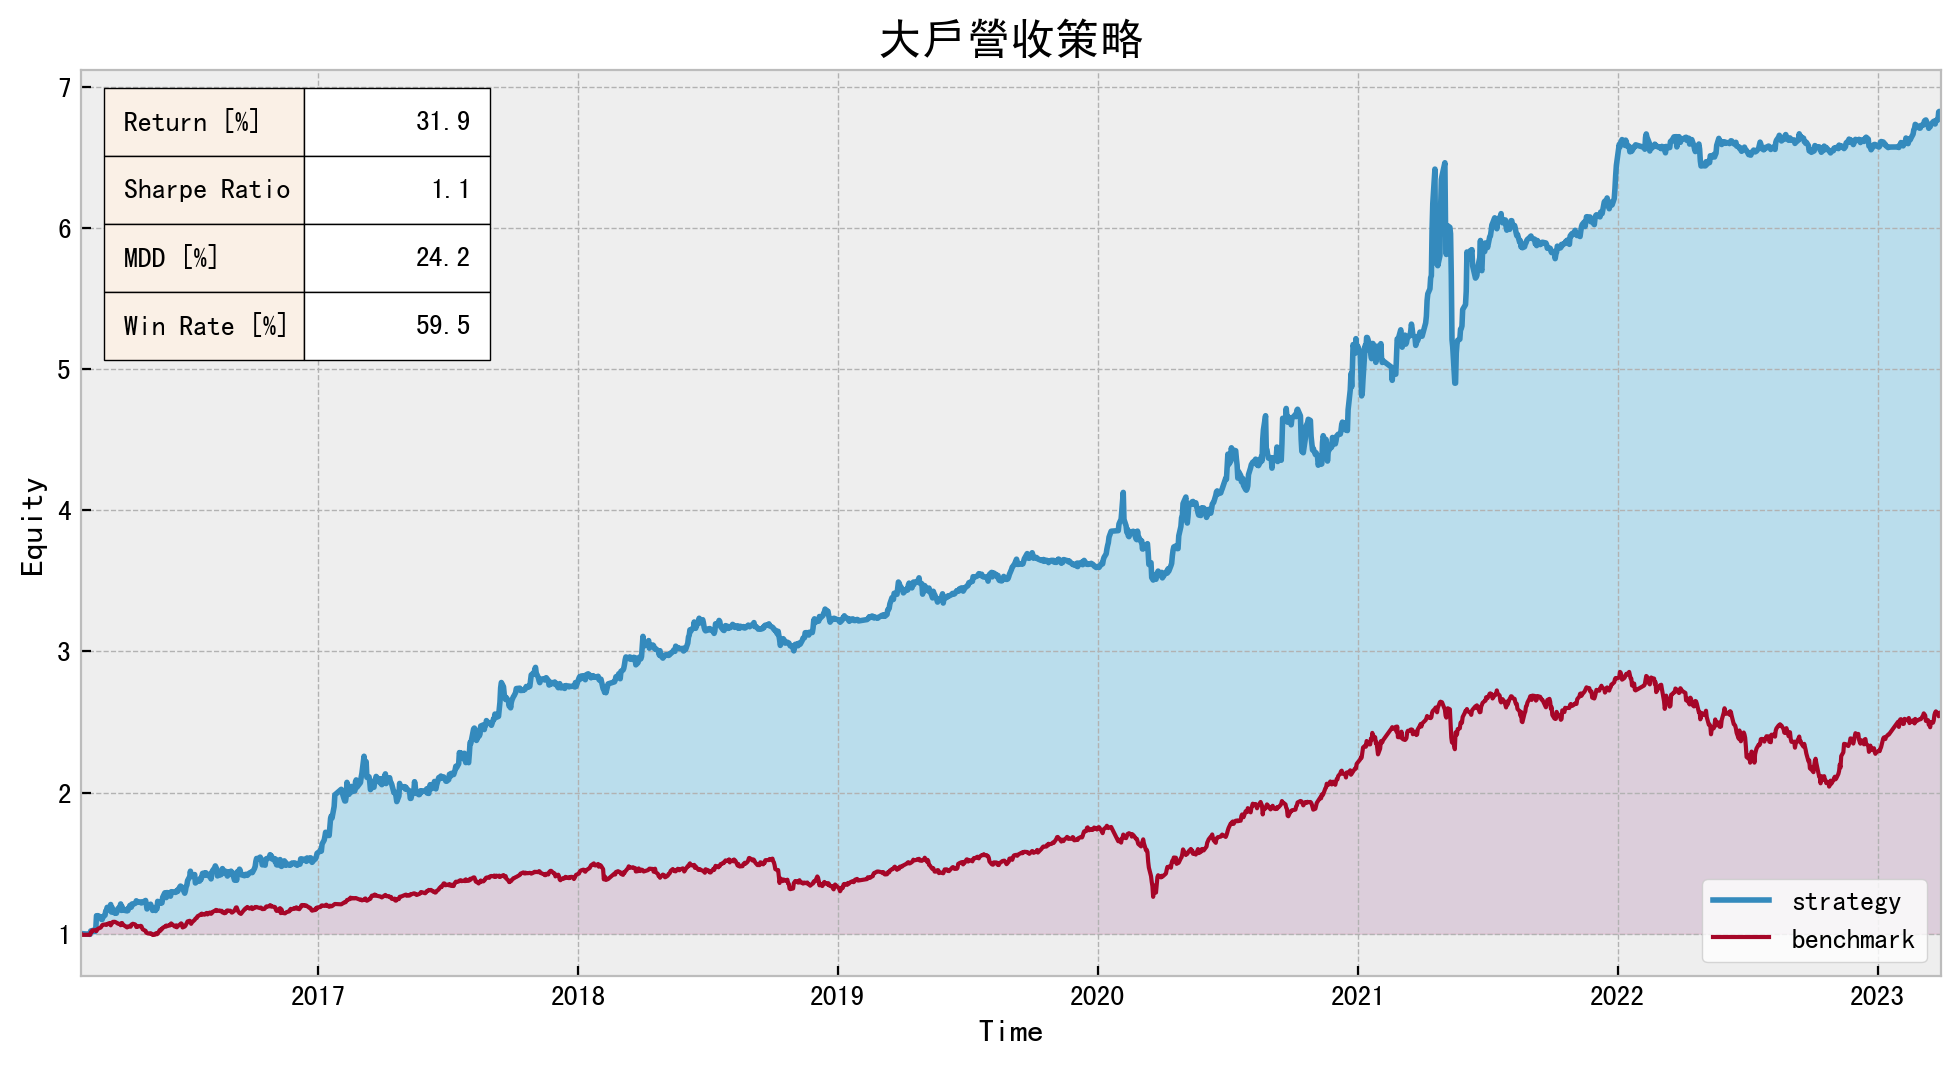

In [72]:
entries = (major > 60) & (rev_y > 40)
exits = major.fall().sustain(2)

bt = bbq.setting(open, nstocks=5, rank=-close)
position = bt.strategy(entries, exits)
report = bt.sim(position)
report.display('大戶營收策略')

In [73]:
report.analyze()

In [74]:
report.stats()

Start Date                    2016-02-02
End Date                      2023-03-31
Period [days]                       1746
Win Period [days]                    938
Total Return [%]                  580.62
Total Benchmark Return [%]        156.89
Return [%]                         31.89
Benchmark Return [%]               14.59
Volatility [%]                     72.05
MDD [%]                            24.18
MDD Duration [days]                   14
Total Trades                         111
Win Rate [%]                       59.46
Best Trade [%]                    127.69
Worst Trade [%]                    -6.64
Average Trade [%]                   5.13
Profit Factor                       7.54
Win Loss Ratio                      5.14
Sharpe Ratio                        1.14
Sortino Ratio                       1.23
Calmar Ratio                        1.32
dtype: object

In [75]:
report.best_trade()

Asset                1475
Entry Date     2019-08-01
Exit Date      2021-07-01
Entry Price          5.02
Exit Price           37.1
Weight                0.2
Return           1.276918
Name: 76, dtype: object

In [76]:
report.worst_trade()

Asset                4530
Entry Date     2022-01-17
Exit Date      2022-12-19
Entry Price           9.5
Exit Price            6.4
Weight                0.2
Return          -0.066433
Name: 99, dtype: object

---

### 《通道突破策略》

標的：台股 (上市櫃)

進場：ADX突破25持續兩天，當天股價創30個交易日新高 (隔日開盤買入)

出場：ADX突破40持續兩天或跌落20持續兩天 (隔日開盤賣出)

頻率：日策略

檔數上限：5 (低股價優先進場)

停損條件：10%

回測期間：2013-02-22 ~ 2023-03-31

In [50]:
import BBQuant as bbq
import pandas as pd
import talib
import warnings
from tqdm import tqdm_notebook
from tqdm.notebook import tqdm_notebook
warnings.filterwarnings("ignore")
tqdm_notebook.pandas()

df_adj = pd.read_feather('/Users/kuanhsu/Desktop/code/Python/FILE/還原股價日資料.ftr')
df = pd.read_feather('/Users/kuanhsu/Desktop/code/Python/FILE/股價日資料.ftr')

In [51]:
def ADX(x):
    x['ADX'] = talib.ADX(x.High, x.Low, x.Close, timeperiod=14)
    return x

df = df.groupby('asset').apply(ADX)

In [52]:
close = bbq.get(df_adj, 'Close')
open = bbq.get(df_adj, 'Open')
volume = bbq.get(df_adj, 'Volume')
adx = bbq.get(df, 'ADX')

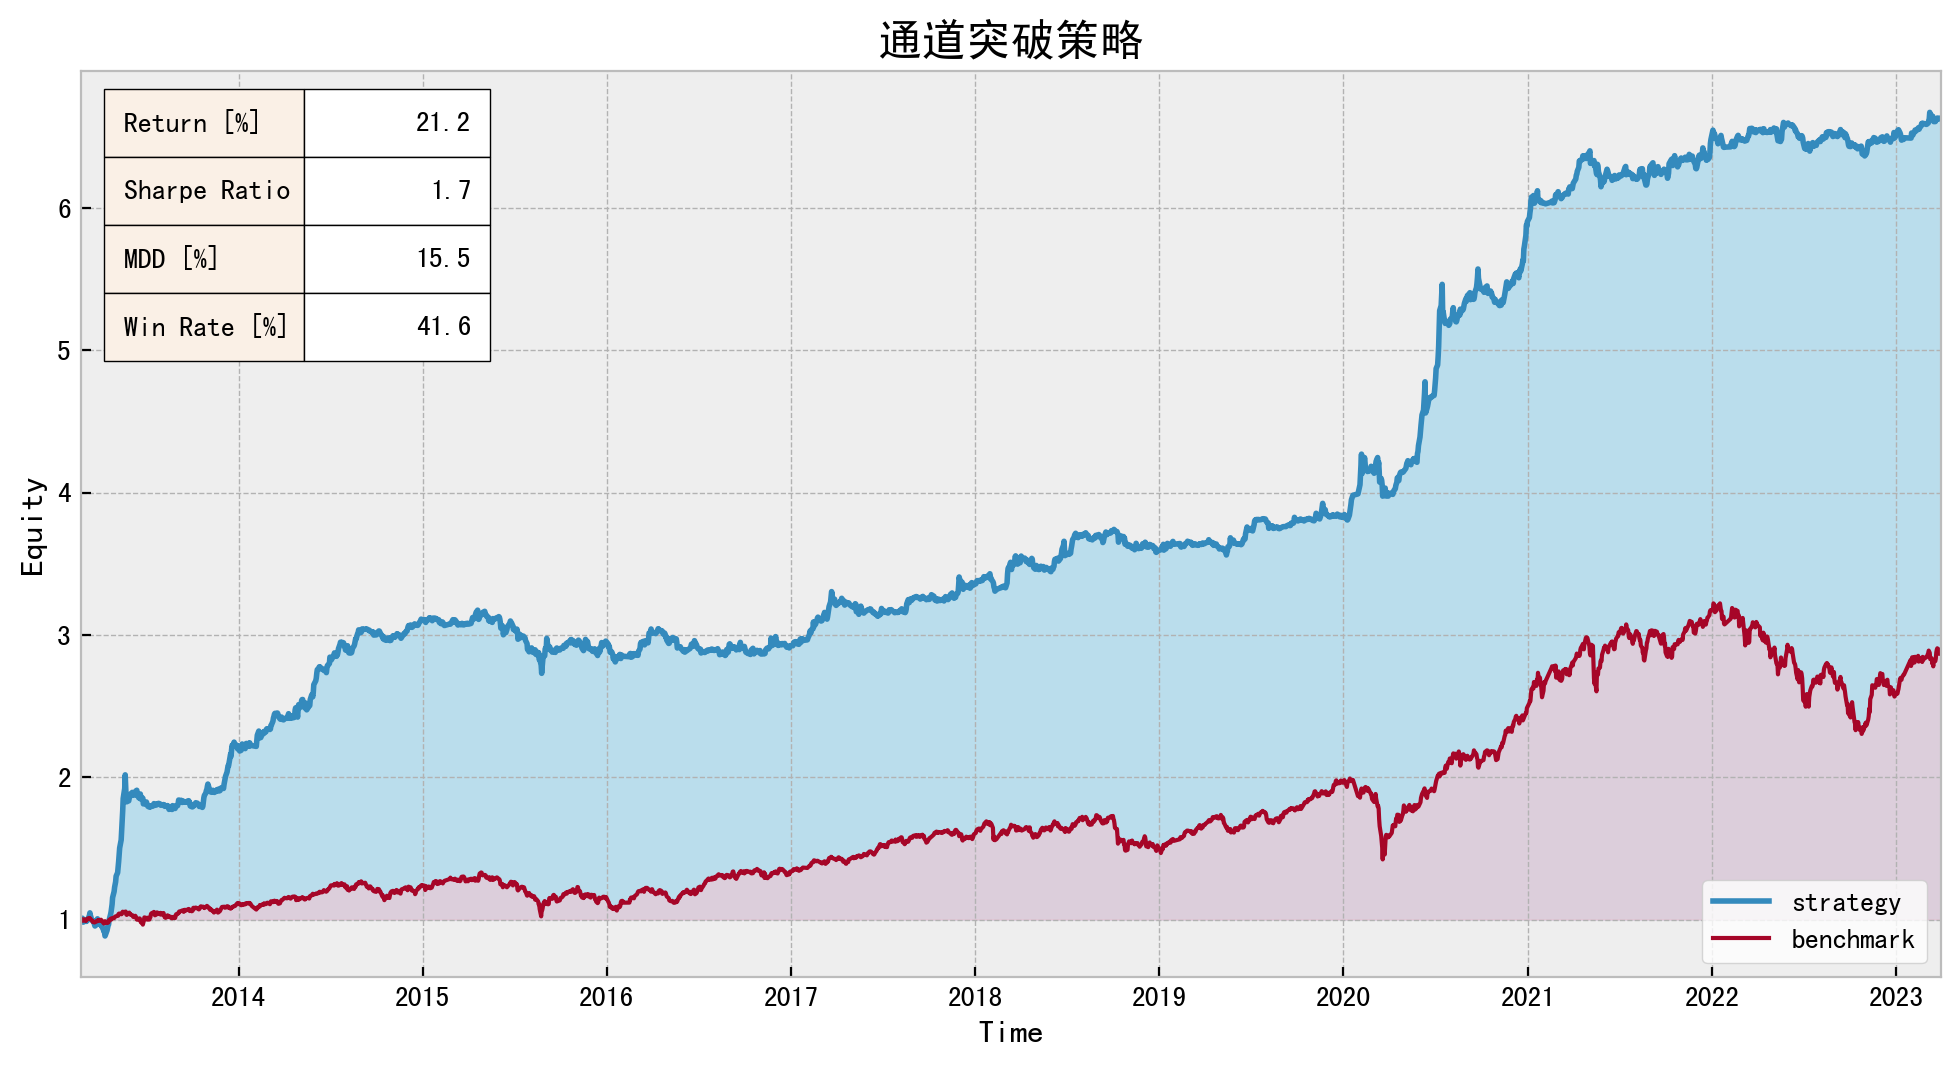

In [77]:
entries = (adx > 25).sustain(2) & (close == close.max(30))
exits = (adx > 40).sustain(2) | (adx < 20).sustain(2)

bt = bbq.setting(open, nstocks=5, rank=-close, stop_loss=0.1)
position = bt.strategy(entries, exits)
report = bt.sim(position)
report.display('通道突破策略')

In [78]:
report.analyze()

In [79]:
report.stats()

Start Date                    2013-02-22
End Date                      2023-03-31
Period [days]                       2476
Win Period [days]                   1348
Total Return [%]                  562.72
Total Benchmark Return [%]        189.88
Return [%]                         21.23
Benchmark Return [%]               11.44
Volatility [%]                     32.42
MDD [%]                            15.53
MDD Duration [days]                   30
Total Trades                         965
Win Rate [%]                       41.55
Best Trade [%]                     83.99
Worst Trade [%]                    -4.69
Average Trade [%]                   0.58
Profit Factor                       2.03
Win Loss Ratio                      2.86
Sharpe Ratio                        1.72
Sortino Ratio                       2.25
Calmar Ratio                        1.37
dtype: object

In [68]:
report.best_trade()

Asset                2540
Entry Date     2013-04-10
Exit Date      2013-05-23
Entry Price          2.97
Exit Price          15.46
Weight                0.2
Return           0.839907
Name: 24, dtype: object

In [69]:
report.worst_trade()

Asset                2025
Entry Date     2019-11-25
Exit Date      2019-11-27
Entry Price           2.8
Exit Price           2.16
Weight                0.2
Return          -0.046884
Name: 640, dtype: object